In [4]:
import networkx as nx
from thewalrus import hafnian
import numpy as np
import random 
import matplotlib.pyplot as plt

# 设置全局字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({"font.size": 16})

# 启用 LaTeX 渲染
plt.rcParams["text.usetex"] = True
# Number of vertexes
n = 256

G0 = nx.Graph(np.load(f"./Data/{n}/G0.npy"))
G1 = nx.Graph(np.load(f"./Data/{n}/G1.npy"))
G2 = nx.Graph(np.load(f"./Data/{n}/G2.npy"))

In [5]:
print(nx.to_numpy_array(G1))

G = G0
matching = set()
for i in range(10):
    e = random.choice(list(G.edges()))
    matching.add(e)

print("edges in matching and in induced subgraph:")
print(G.edge_subgraph(matching).edges)
print(G.subgraph(G.edge_subgraph(matching).nodes()).edges)

[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
edges in matching and in induced subgraph:
[(72, 60), (205, 217), (16, 158), (146, 94), (218, 27), (155, 158), (220, 191), (31, 32), (100, 38), (112, 185)]
[(16, 27), (16, 94), (16, 100), (16, 112), (16, 146), (16, 155), (16, 158), (16, 191), (16, 218), (16, 220), (146, 38), (146, 60), (146, 94), (146, 112), (146, 191), (146, 217), (146, 218), (155, 27), (155, 31), (155, 32), (155, 38), (155, 72), (155, 94), (155, 112), (155, 158), (155, 191), (155, 217), (155, 218), (155, 220), (27, 60), (27, 158), (27, 185), (27, 205), (27, 218), (158, 38), (158, 60), (158, 185), (158, 205), (158, 218), (31, 32), (31, 60), (31, 72), (31, 94), (31, 100), (31, 185), (31, 217), (32, 60), (32, 100), (32, 185), (32, 205), (38, 72), (38, 100), (38, 217), (38, 218), (185, 94), (185, 112), (185, 217), (185, 218), (60, 72), (60, 94), (60, 112), (60, 191), 

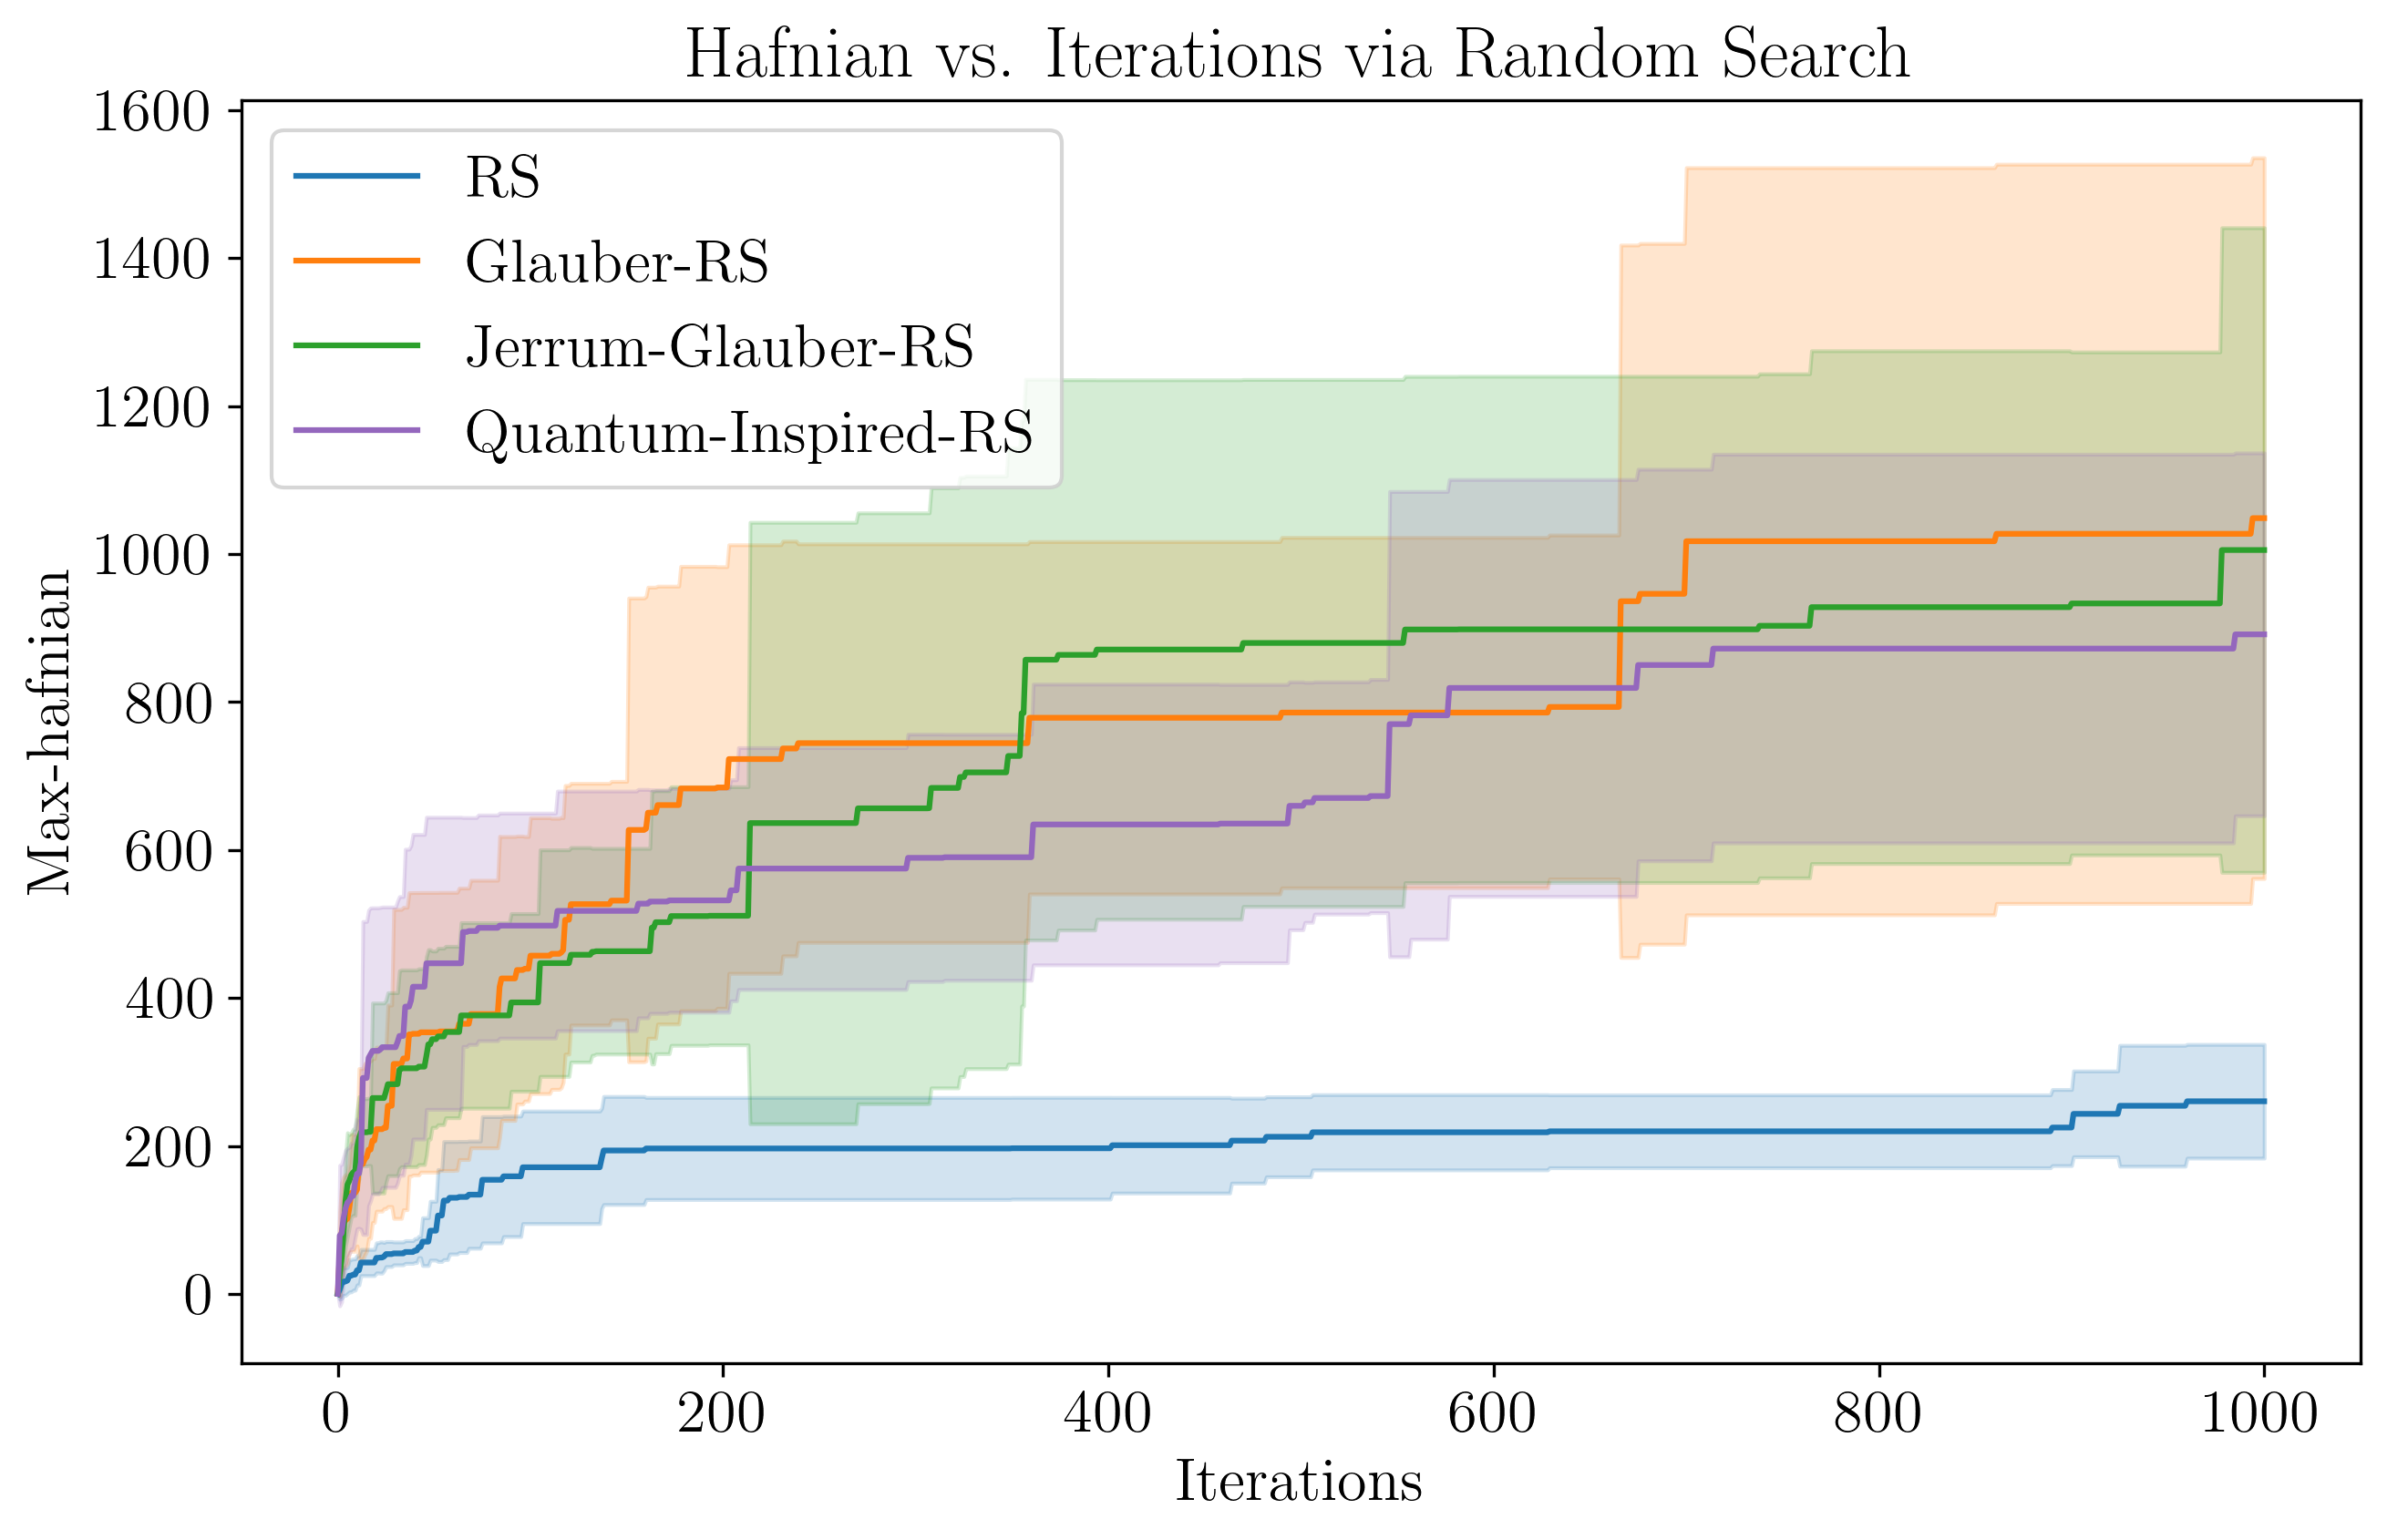

In [ ]:
G = G1
n = 256
iteration = 1000
method = 'RS'
function = 'hafnian'
plt.figure(figsize=(10, 6), dpi=300)

max_density_list = np.load(f"./Data/{n}/{method}_{function}_list.npy")
mean_density_values = np.mean(max_density_list, axis=0)
std_density_values = np.std(max_density_list, axis=0)

plt.plot(mean_density_values, label=f"{method}", color='C0')
plt.fill_between(range(iteration+1), mean_density_values - std_density_values, mean_density_values + std_density_values, color = 'C0', alpha=0.2)

glauber_max_density_list= np.load(f"./Data/{n}/glauber_{method}_{function}_list.npy")
mean_glauber_density_values = np.mean(glauber_max_density_list, axis=0)
std_glauber_density_values = np.std(glauber_max_density_list, axis=0)

plt.plot(mean_glauber_density_values, label=f"Glauber-{method}", color='C1')
plt.fill_between(range(iteration+1), mean_glauber_density_values - std_glauber_density_values, mean_glauber_density_values + std_glauber_density_values, color = 'C1', alpha=0.2)

jerrum_glauber_max_density_list= np.load(f"./Data/{n}/jerrum_glauber_{method}_{function}_list.npy")
mean_jerrum_glauber_density_values = np.mean(jerrum_glauber_max_density_list, axis=0)
std_jerrum_glauber_density_values = np.std(jerrum_glauber_max_density_list, axis=0)

plt.plot(mean_jerrum_glauber_density_values, label=f"Jerrum-Glauber-{method}", color='C2')
plt.fill_between(range(iteration+1), mean_jerrum_glauber_density_values - std_jerrum_glauber_density_values, mean_jerrum_glauber_density_values + std_jerrum_glauber_density_values, color = 'C2', alpha=0.2)
 
quantum_inspired_max_density_list = np.load(f"./Data/{n}/quantum_inspired_{method}_{function}_list.npy")
mean_quantum_inspired_density_values = np.mean(quantum_inspired_max_density_list, axis=0)
std_quantum_inspired_density_values = np.std(quantum_inspired_max_density_list, axis=0)

plt.plot(mean_quantum_inspired_density_values, label=f"Quantum-Inspired-{method}", color='C4')
plt.fill_between(range(iteration+1), mean_quantum_inspired_density_values - std_quantum_inspired_density_values, mean_quantum_inspired_density_values + std_quantum_inspired_density_values, color = 'C4', alpha=0.2)

Function = function.capitalize()

plt.xlabel("Iterations")
plt.ylabel(f"Max-{function}")
plt.title(f"{Function} vs. Iterations via Random Search")
plt.legend(loc = "best")
if method == 'RS':
    plt.savefig(f"./Figure/{function}_random_search.pdf")
elif method == 'SA':
    plt.savefig(f"./Figure/{function}_simulated_annealing.pdf")
plt.show()

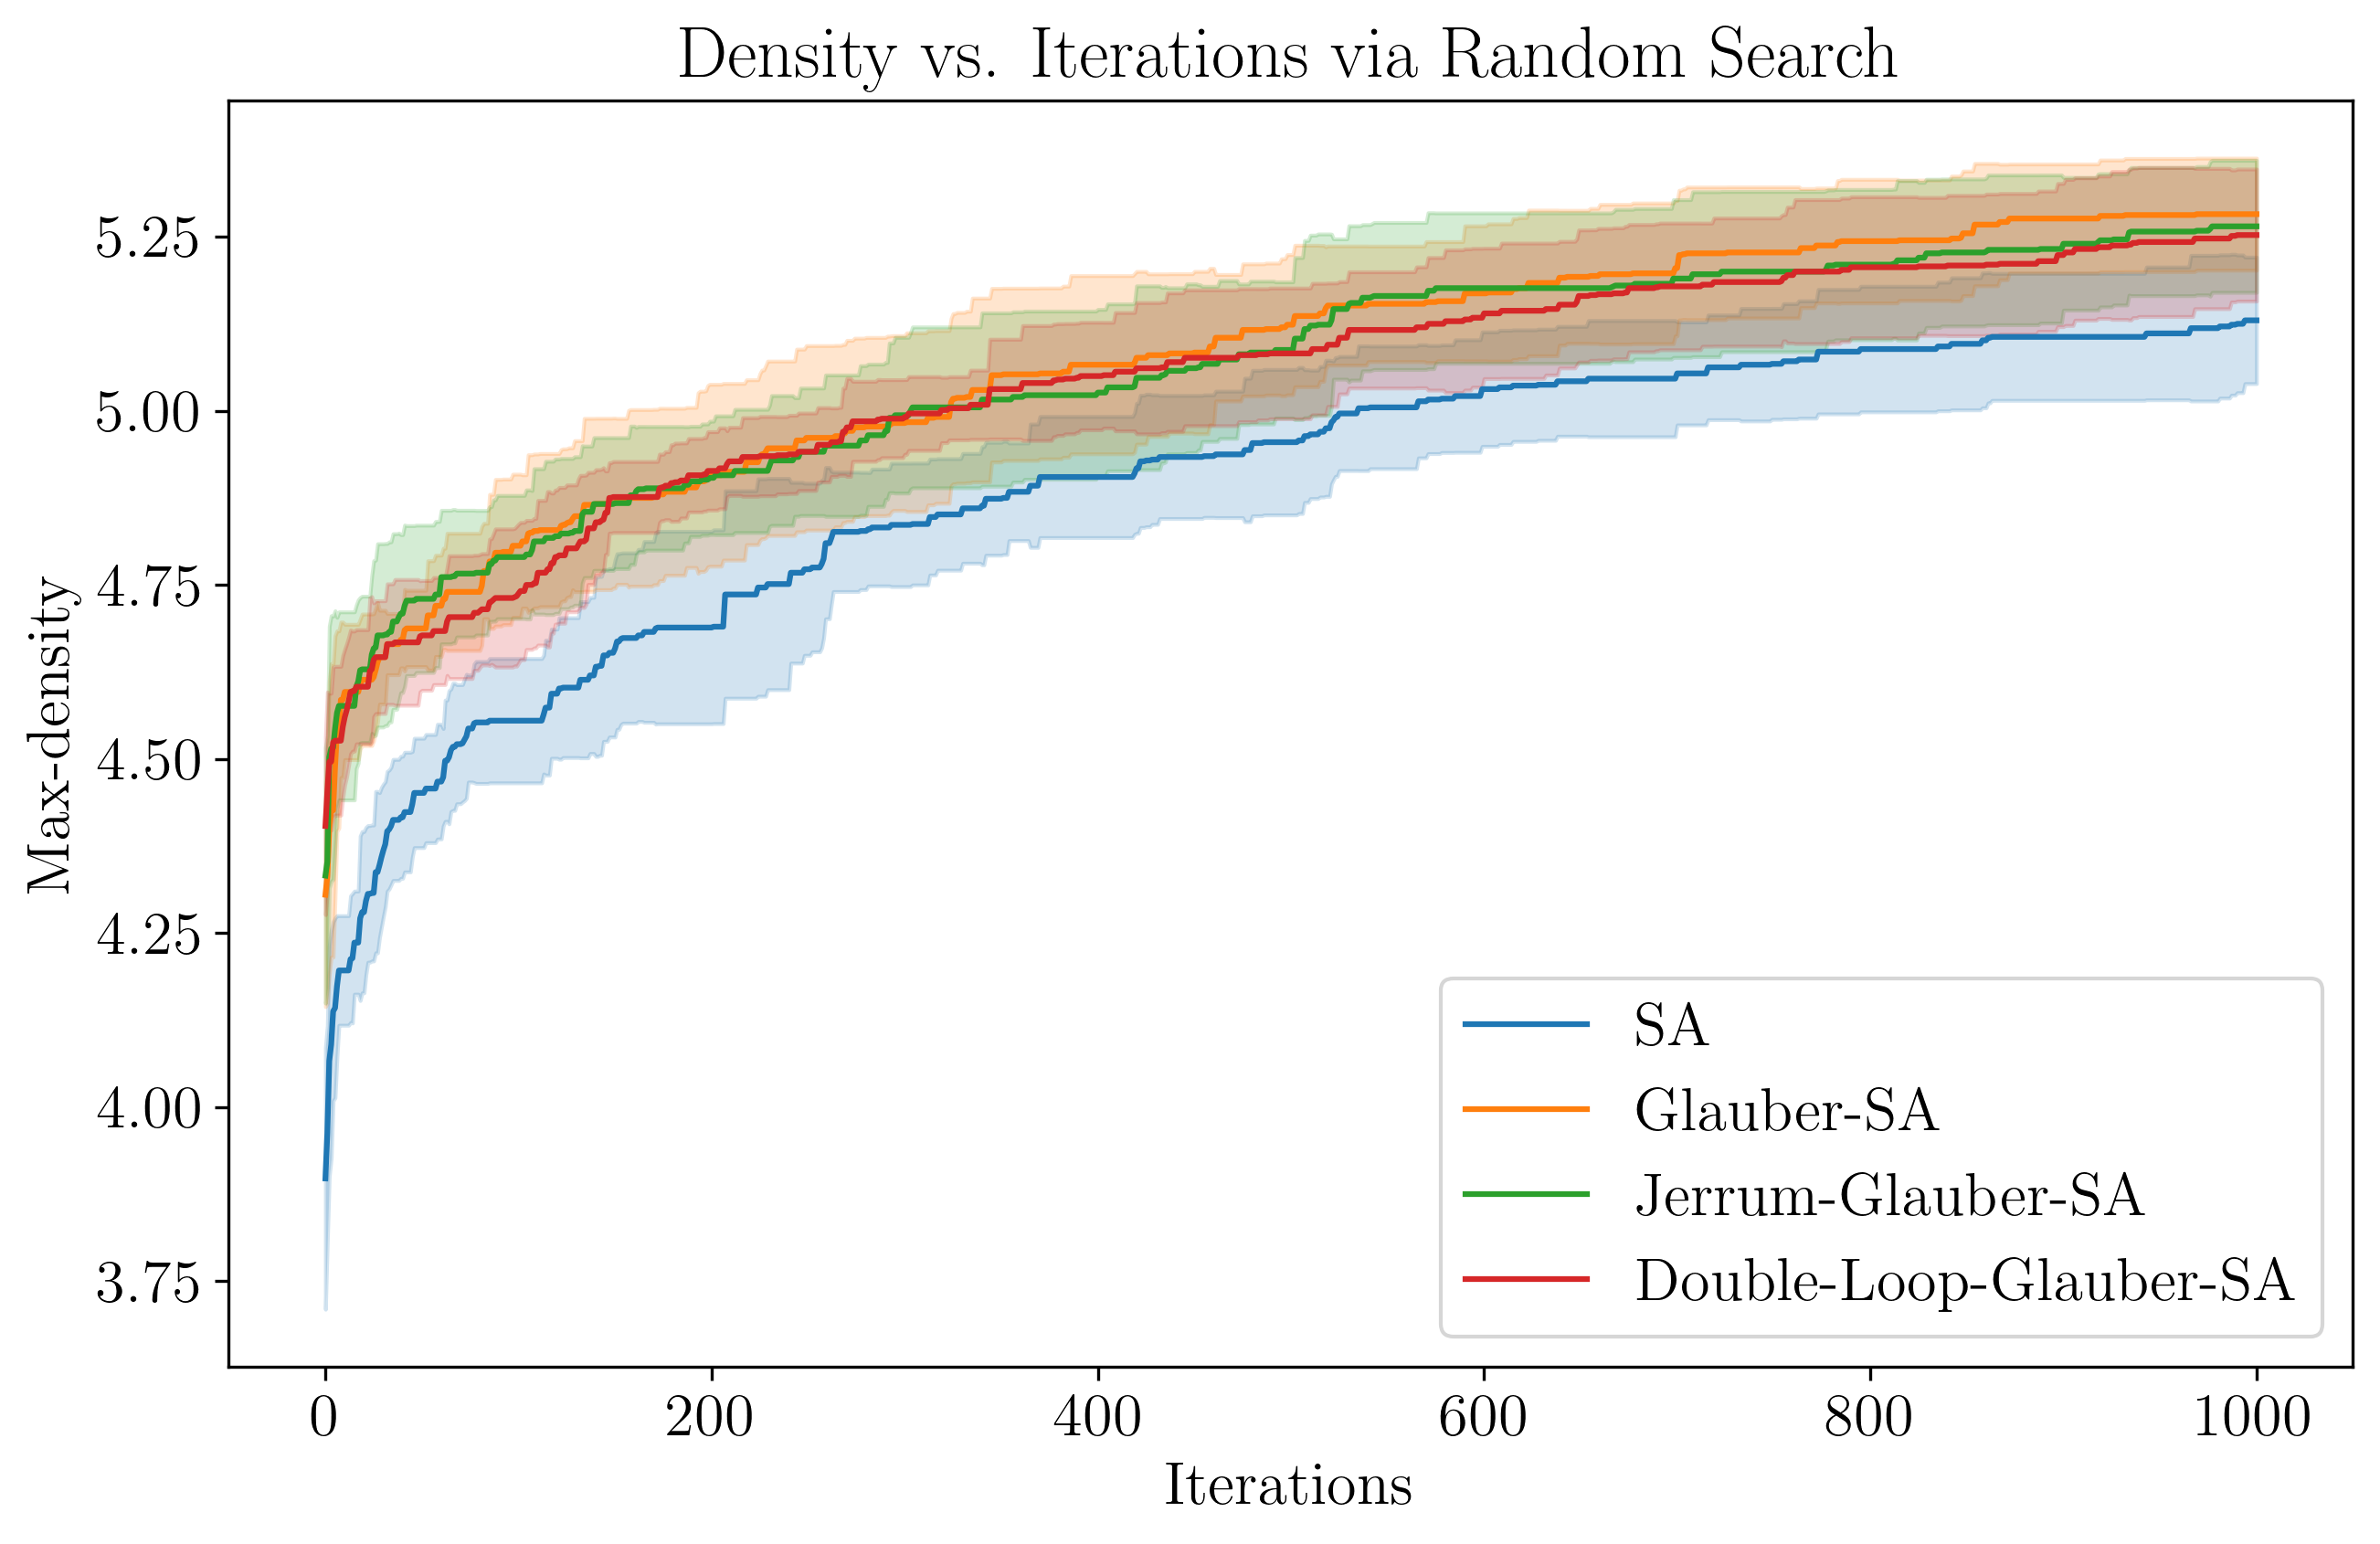

In [12]:
# Plot the max-Hafnian values of the 16-node subgraph with the maximum Hafnian using Random Search
n = 256
iteration = 1000
function = 'density'
method = 'SA'
plt.figure(figsize=(10, 6), dpi=300)


# Finding the 16-node subgraph with the maximum Hafnian using Random Search

max_hafnian_list = np.load(f"./Data/bipartite/{method}_{function}_list.npy")
mean_hafnian_values = np.mean(max_hafnian_list, axis=0)
std_hafnian_values = np.std(max_hafnian_list, axis=0)

plt.plot(mean_hafnian_values, label=f"{method}", color='C0')
plt.fill_between(range(iteration+1), mean_hafnian_values - std_hafnian_values, mean_hafnian_values + std_hafnian_values, color = 'C0', alpha=0.2)

# Finding the 16-node subgraph with the maximum Hafnian using Glauber Random Search

glauber_max_hafnian_list = np.load(f"./Data/bipartite/glauber_{method}_{function}_list.npy")
mean_glauber_hafnian_values = np.mean(glauber_max_hafnian_list, axis=0)
std_glauber_hafnian_values = np.std(glauber_max_hafnian_list, axis=0)

plt.plot(mean_glauber_hafnian_values, label=f"Glauber-{method}", color='C1')
plt.fill_between(range(iteration+1), mean_glauber_hafnian_values - std_glauber_hafnian_values, mean_glauber_hafnian_values + std_glauber_hafnian_values, color = 'C1', alpha=0.2)

# Finding the 16-node subgraph with the maximum Hafnian using Jerrum Glauber Random Search

jerrum_glauber_max_hafnian_list = np.load(f"./Data/bipartite/jerrum_glauber_{method}_{function}_list.npy")
mean_jerrum_glauber_hafnian_values = np.mean(jerrum_glauber_max_hafnian_list, axis=0)
std_jerrum_glauber_hafnian_values = np.std(jerrum_glauber_max_hafnian_list, axis=0)

plt.plot(mean_jerrum_glauber_hafnian_values, label=f"Jerrum-Glauber-{method}", color='C2')
plt.fill_between(range(iteration+1), mean_jerrum_glauber_hafnian_values - std_jerrum_glauber_hafnian_values, mean_jerrum_glauber_hafnian_values + std_jerrum_glauber_hafnian_values, color = 'C2', alpha=0.2)
 
# # Finding the 16-node subgraph with the maximum Hafnian using Quantum Inspired Random Search
# 
# quantum_inspired_max_hafnian_list = np.load(f"./Data/bipartite/quantum_inspired_{method}_{function}_list.npy")
# mean_quantum_inspired_hafnian_values = np.mean(quantum_inspired_max_hafnian_list, axis=0)
# std_quantum_inspired_hafnian_values = np.std(quantum_inspired_max_hafnian_list, axis=0)
# 
# plt.plot(mean_quantum_inspired_hafnian_values, label=f"Quantum-Inspired-{method}", color='C4')
# plt.fill_between(range(iteration+1), mean_quantum_inspired_hafnian_values - std_quantum_inspired_hafnian_values, mean_quantum_inspired_hafnian_values + std_quantum_inspired_hafnian_values, color = 'C4', alpha=0.2)

double_loop_glauber_max_density_list = np.load(f"./Data/bipartite/double_loop_glauber_{method}_{function}_list.npy", )
mean_double_loop_glauber_density_values = np.mean(double_loop_glauber_max_density_list, axis=0)
std_double_loop_glauber_density_values = np.std(double_loop_glauber_max_density_list, axis=0)

plt.plot(mean_double_loop_glauber_density_values, label=f"Double-Loop-Glauber-{method}", color='C3')
plt.fill_between(range(iteration+1), mean_double_loop_glauber_density_values - std_double_loop_glauber_density_values, mean_double_loop_glauber_density_values + std_double_loop_glauber_density_values, color = 'C3', alpha=0.2)

Function = function.capitalize()

plt.xlabel("Iterations")
plt.ylabel(f"Max-{function}")
plt.title(f"{Function} vs. Iterations via Random Search")
plt.legend(loc = "best")

if method == 'RS':
    plt.savefig(f"./Figure/double_loop_{function}_random_search.pdf")
else:
    plt.savefig(f"./Figure/double_loop_{function}_simulated_annealing.pdf")
plt.show()

In [4]:
# Initial matching is empty set
def glauber_dynamics(G, k, c, mixing_time):
    matching = set()
    post_select_subgraph = list()
    
    for _ in range(mixing_time):
        # Randomly select an edge
        e = random.choice(list(G.edges()))
        u, v = e
        # Check the status of the selected edge
        if all(node not in list(n for edge in matching for n in edge) for node in e):
            # Both u and v are not in the matching
            if np.random.rand() <= c**2 / (1 + c**2):
                matching.add(e)
        elif e in matching:
            # Both u and v are in the matching
            if np.random.rand() <= 1 / (1 + c**2):
                matching.remove(e)
        
        # Check if the matching is a k-subgraph
        if 2 * len(matching) == k:
            post_select_subgraph.append(G.subgraph(G.edge_subgraph(matching).nodes()))
        
    return post_select_subgraph[-1]

def quantum_inspired_sampling(G, k):
    A = nx.adjacency_matrix(G).toarray()
    # Construct the diagonal-dominant matrix
    for i in range(n):
        for j in range(n):
            if not(j==i):
                A[i][i]+=abs(A[i][j])
                
    # Function to create the vector b^(ij) from A_ij  
    def create_b_ij(A, i, j):
        b_ij = np.zeros(A.shape[0])  # M-dimensional vector
        b_ij[i] = np.sqrt(A[i, j])
        b_ij[j] = np.sqrt(A[i, j])
        return b_ij

    # Construct the matrix H
    M = A.shape[0]  # Matrix dimension (M x M)
    H = np.zeros((M, M * M))  # H is M x M^2 matrix

    # Fill the matrix H as per the given description
    for i in range(M):
        for j in range(i + 1, M):
            b_ij = create_b_ij(A, i, j)
            column_index = M * i + j  # Column index in H
            H[:, column_index] = b_ij
        
    # Construct the diagonal matrix D
    D_diag = np.sum(H, axis=0) 
    D = np.diag(D_diag)  

    # Construct the matrix V
    V = np.zeros_like(H)  
    for i in range(H.shape[1]):
        if D_diag[i] > 0:  # Avoid division by zero
            V[:, i] = H[:, i] / D_diag[i]
        else:
            V[:, i] = 0  # Set the column to zero if D_ii = 0

    trace = np.sum(D_diag ** 2)
    Q = np.diag(D_diag **2) / trace
    
    # Verify that A = HH^T
    A_reconstructed = V @ D @ D @ V.T

    row_indices = []
    while len(row_indices) < k:
        row_indices = []
        selected_columns = np.random.choice(len(D_diag), size= k//2, replace=True, p= D_diag **2/trace)
        
        # Get the row indices of the non-zero elements in the selected columns
        for col in selected_columns:
            non_zero_indices = np.nonzero(V[:, col])[0]  # Get the row indices of non-zero elements
            row_indices.extend(non_zero_indices)  # Add the row indices to the list
        
        # remove duplicates
        row_indices = list(set(row_indices))
    
    return G.subgraph(row_indices),V,Q,H

def double_loop_glauber_dynamics(G, k, c, mixing_time):
    # G is a bipartite graph
    matching = set()
    post_select_subgraph = list()
    
    for _ in range(10 * mixing_time):
        # Randomly select an edge
        e = random.choice(list(G.edges()))
        # Check the status of the selected edge
        if all(node not in list(n for edge in matching for n in edge) for node in e):
            # Both u and v are both not in the matching
            if np.random.rand() <= c**4 / (1 + c**4):
                matching.add(e)
        elif e in matching:
            # Both u and v are in the matching
            uniform_matching = matching
            subgraph = G.subgraph(G.edge_subgraph(matching).nodes())
            # Uniformly sample a perfect matching from the subgraph
            for _ in range(mixing_time // 10):
                if len(uniform_matching) == len(subgraph.nodes())//2: # is perfect matching
                    new_e = random.choice(list(subgraph.edges()))
                    new_uniform_matching = uniform_matching - {new_e}
                elif len(uniform_matching) == len(subgraph.nodes())//2 -1: # is approximate perfect matching
                    missing_point = set(subgraph.nodes())-set(n for edge in uniform_matching for n in edge)
                    u = list(missing_point)[0]
                    v = list(missing_point)[1]
                    new_e = random.choice(list(subgraph.edges()))
                    if (u in new_e and v in new_e):
                        new_uniform_matching = uniform_matching | {new_e}
                    elif (u in new_e and not(v in new_e)):
                        for edge in uniform_matching:
                            for n in edge:
                                if n in new_e:
                                    new_uniform_matching = uniform_matching - {edge} | {new_e}
                                    break
                    elif (v in new_e and not(u in new_e)):
                        for edge in uniform_matching:
                            for n in edge:
                                if n in new_e:
                                    new_uniform_matching = uniform_matching - {edge} | {new_e}
                                    break
                    else:
                        new_uniform_matching = uniform_matching
                    
                if np.random.rand() < min(1, 1):
                    uniform_matching = new_uniform_matching
                    
            if e in uniform_matching:
                if np.random.rand() <= 1 / (1 + c**4):
                    matching.remove(e)
        
        # Check if the matching is a k-subgraph
        if 2 * len(matching) == k:
            post_select_subgraph.append(G.subgraph(G.edge_subgraph(matching).nodes()))
        
    return post_select_subgraph[-1]
    
for _ in range(10):
    subgraph = double_loop_glauber_dynamics(G0, k=80, c=0.4, mixing_time=1000)
    
len(list(subgraph.nodes()))

80

In [11]:
a1 = np.load("/Users/AntiEntropy/Downloads/double_loop_glauber_SA_density_list.npy")
a2 = np.load("/Users/AntiEntropy/Downloads/double_loop_glauber_SA_density_list (1).npy")
a3 = np.load("/Users/AntiEntropy/Downloads/double_loop_glauber_SA_density_list (2).npy")
a4 = np.load("/Users/AntiEntropy/Downloads/double_loop_glauber_SA_density_list (3).npy")
a5 = np.load("/Users/AntiEntropy/Downloads/double_loop_glauber_SA_density_list (4).npy") 
a6 = np.load("/Users/AntiEntropy/Downloads/double_loop_glauber_SA_density_list (5).npy")
a7 = np.load("/Users/AntiEntropy/Downloads/double_loop_glauber_SA_density_list (6).npy")
a8 = np.load("/Users/AntiEntropy/Downloads/double_loop_glauber_SA_density_list (7).npy")
a9 = np.load("/Users/AntiEntropy/Downloads/double_loop_glauber_SA_density_list (8).npy")
a10 = np.load("/Users/AntiEntropy/Downloads/double_loop_glauber_SA_density_list (9).npy")

# 使用 np.vstack 进行纵向拼接
result = np.vstack([a1, a2, a3, a4, a5, a6, a7, a8, a9, a10])
# 保存结果到文件
np.save("./Data/bipartite/double_loop_glauber_SA_density_list", result)

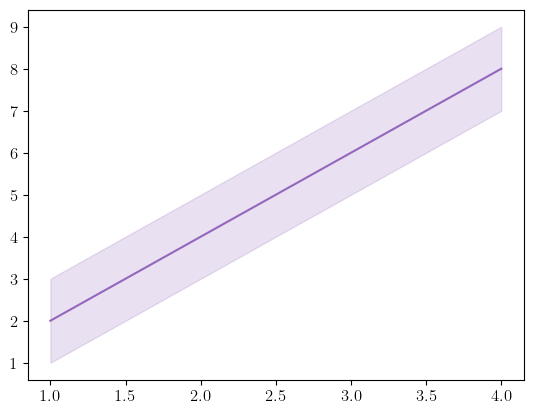

In [ ]:
x = np.array([1,2,3,4])
y = 2 * x

plt.plot(x,y,color = 'C4')
plt.fill_between(x, y-1, y+1, color = 'C4', alpha=0.2)

In [19]:
n = "bipartite"
method = 'RS'
function = 'density'
iteration = 1000
plt.figure(figsize=(10, 6), dpi=300)

max_density_list = np.load(f"./Data/{n}/{method}_{function}_list.npy")
mean_density_values = np.mean(max_density_list, axis=0)
std_density_values = np.std(max_density_list, axis=0)

glauber_max_density_list= np.load(f"./Data/{n}/glauber_{method}_{function}_list.npy")
mean_glauber_density_values = np.mean(glauber_max_density_list, axis=0)
std_glauber_density_values = np.std(glauber_max_density_list, axis=0)

jerrum_glauber_max_density_list= np.load(f"./Data/{n}/jerrum_glauber_{method}_{function}_list.npy")
mean_jerrum_glauber_density_values = np.mean(jerrum_glauber_max_density_list, axis=0)
std_jerrum_glauber_density_values = np.std(jerrum_glauber_max_density_list, axis=0)

quantum_inspired_max_density_list = np.load(f"./Data/{n}/double_loop_glauber_{method}_{function}_list.npy")
mean_quantum_inspired_density_values = np.mean(quantum_inspired_max_density_list, axis=0)
std_quantum_inspired_density_values = np.std(quantum_inspired_max_density_list, axis=0)

print(mean_glauber_density_values[-1]/mean_density_values[-1], mean_jerrum_glauber_density_values[-1]/mean_density_values[-1], mean_quantum_inspired_density_values[-1]/mean_density_values[-1])
print((mean_glauber_density_values[-1]+std_glauber_density_values[-1])/(mean_density_values[-1]+std_density_values[-1]), (mean_jerrum_glauber_density_values[-1]+std_jerrum_glauber_density_values[-1])/(mean_density_values[-1]+std_density_values[-1]), (mean_quantum_inspired_density_values[-1]+std_quantum_inspired_density_values[-1])/(mean_density_values[-1]+std_density_values[-1]))

1.0902378999179658 1.0836751435602954 1.0937927262783704
1.0890667794565072 1.0877035181891472 1.0955946753348613


<Figure size 3000x1800 with 0 Axes>

In [ ]:
mean_glauber_density_values[-1]+std_glauber_density_values[-1]
mean_density_values[-1]

260.3

In [41]:
delta = (np.load("./Data/256/G0.npy")-np.load("./G0.npy"))